### A complete data exploration task
The following cells demonstrate a possible use of Pandas to perform data exploration and visualization using its internals.

For this purpose, we'll be using a dataset about diamonds characteristics to show the basic steps of data exploration:

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd # pd alias Pandas library, useful for data manipulation and analysis
import numpy as np # np alias NumPy library, useful for numerical computations

filename = '/content/gdrive/MyDrive/Colab Notebooks/Assignment/diamonds.csv'
dmds = pd.read_csv(filename) # This line reads the CSV file into a DataFrame (a table-like structure in Pandas) and stores it in the variable dmds
data = dmds.copy() # This creates a copy of the original DataFrame (dmds) and assigns it to the variable data.
                   # Copying ensures that if changes are made to data, the original DataFrame (dmds) remains unaffected.

data.tail()  # It displays the last 5 rows of the DataFrame by default
data.head()  # It displays the first 5 rows of the DataFrame by default
# data.shape matrix dimensions
# diamonds.csv contains information about diamonds (e.g., their carat, cut, color, clarity, price),
# the .tail() method allows us to quickly view a portion of the dataset to verify its structure or check for anomalies in the last entries.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The <code>info</code> command displays the column names with their relevant data types and memory occupation for the loaded dataset.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


When you run data.info(), the following details are displayed:

    DataFrame Dimensions:
        Shows the total number of rows and columns in the DataFrame.

    Column Names and Data Types:
        Lists all the column names.
        Indicates the data type (int64, float64, object, etc.) of each column.
        Common data types:
            int64: Integer values.
            float64: Decimal numbers.
            object: Usually string data (text).

    Non-Null Values:
        Displays the count of non-null (non-missing) values for each column.
        Helps identify columns with missing data.

    Memory Usage:
        Indicates the memory used by the DataFrame.

The <code>describe</code> method displays statistical information about the dataset for all numerical columns.  
It is a quick way to understand the distribution and variability of the data.  
As shown in the table below the categorical variables are disregarded by the function:

In [27]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


    Count:
        The number of non-null (non-missing) values in the column.

    Mean:
        The average value of the column.

    Standard Deviation (std):
        A measure of how spread out the values are from the mean.

    Min:
        The smallest value in the column.

    25th Percentile (25%):
        The value below which 25% of the data lies (first quartile).

    50th Percentile (50%):
        The median value, dividing the data into two halves.

    75th Percentile (75%):
        The value below which 75% of the data lies (third quartile).

    Max:
        The largest value in the column.



Specific percentile values can be displayed by adding the list of desired percentiles in the <code>percentiles</code> parameter of the describe method:  
<code>percs = [.1, .3, .7, .9]</code>

    This defines a list of percentiles to include in the summary.
    These percentiles represent the 10th, 30th, 70th, and 90th percentiles of the data.

<code>data.describe(percentiles=percs)</code>

    The percentiles parameter allows you to specify which percentiles to calculate in addition to the default ones (25%, 50%, and 75%).
    In this case, the output will include 10th, 30th, 70th, and 90th percentiles instead of the default ones.

In [28]:
percs = [.1, .3, .7, .9]
data.describe(percentiles=percs)

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
10%,0.310000,60.000000,55.000000,646.000000,4.360000,4.360000,2.690000
30%,0.420000,61.200000,56.000000,1087.000000,4.820000,4.830000,2.980000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
70%,1.010000,62.400000,58.000000,4662.000000,6.420000,6.420000,3.980000
90%,1.510000,63.300000,60.000000,9821.000000,7.310000,7.300000,4.520000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In order to display additional information about __categorical variables__ an additional parameter should be specified to obtain record count, the number of unique values of each variable, the most frequent value and its occurrence count.

In [29]:
data.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


For such columns, the summary provides:

    Count:
        The number of non-null (non-missing) entries in the column.

    Unique:
        The number of unique (distinct) values in the column.

    Top:
        The most frequently occurring value in the column.

    Freq:
        The frequency (number of times) the top value appears.

In order to display the unique values for categorical features, the following command can be used:

In [30]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [31]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

One important transformation that might be useful for data manipulation is mapping all categorical variables into numerical equivalents. To do this, we first create the proper dictionaries:

In [33]:
cut_map = {v: c for c, v in enumerate(data['cut'].unique())}
color_map = {v: c for c, v in enumerate(data['color'].unique())}
clarity_map = {v: c for c, v in enumerate(data['clarity'].unique())}

This code creates mapping dictionaries that assign a unique numeric value to each unique category in the <code>cut</code>, <code>color</code>, and <code>clarity</code> columns of the DataFrame data. This is useful for converting categorical data into numerical values for tasks like modeling or analysis.

In [34]:
cut_map, color_map, clarity_map

({'Ideal': 0, 'Premium': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4},
 {'E': 0, 'I': 1, 'J': 2, 'H': 3, 'F': 4, 'G': 5, 'D': 6},
 {'SI2': 0,
  'SI1': 1,
  'VS1': 2,
  'VS2': 3,
  'VVS2': 4,
  'VVS1': 5,
  'I1': 6,
  'IF': 7})

Then we map the dataframe columns using the dictionaries to replace the textual values with the numerical ones:

<code>data['cut'] = data['cut'].map(cut_map)</code>

    data['cut']:
        Refers to the cut column in the DataFrame.
    .map(cut_map):
        Applies the cut_map dictionary to replace each categorical value in the column with its corresponding numeric value.
        For example:
            'Ideal' → 0
            'Premium' → 1

In [35]:
data['cut'] = data['cut'].map(cut_map)
data['color'] = data['color'].map(color_map)
data['clarity'] = data['clarity'].map(clarity_map)
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,0,6,0,62.2,55.0,2757,5.83,5.87,3.64


It is often necessary to clean the dataset from __NaN values__ before applying __any machine learning__ algorithm, therefore we first need to check and eventually count these values across the columns:

In [36]:
data.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


A summary of the number of occurrencies of each symbol in a colum in descending order is easily obtained by:

In [37]:
count = dmds['cut'].value_counts()
count

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


1. <code>dmds['cut']</code>

    This selects the <code>cut</code> column from the DataFrame dmds.

2. <code>.value_counts()</code>

    This method counts the occurrences of each unique value in the <code>cut</code> column.
    It sorts the results in descending order by default.

<Axes: ylabel='cut'>

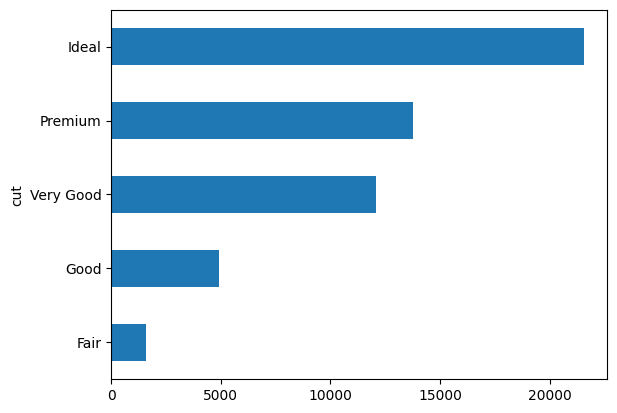

In [38]:
count.sort_values(ascending=True).plot(kind='barh')

<code>count.sort_values(ascending=True)</code>

    count is a Pandas Series resulting from dmds['cut'].value_counts(), where each unique value in the cut column is a key, and its frequency is the corresponding value.
    .sort_values(ascending=True):
        Sorts the values in ascending order (from smallest to largest frequency).

A <code>group by</code> clause can be used to display more detailed information about a given column, preserving the natural ordering of the aggregation column, such as:

<Axes: xlabel='cut'>

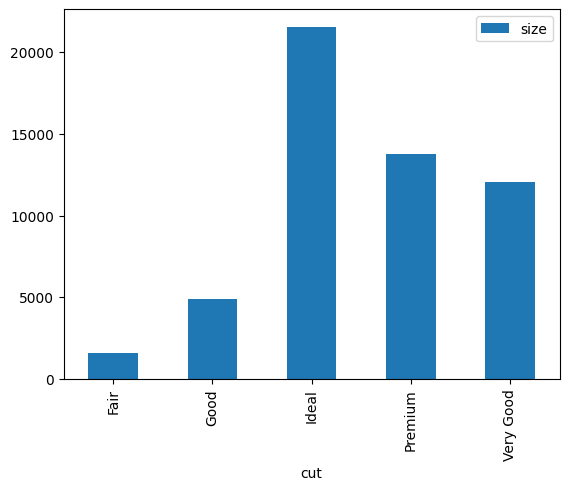

In [39]:
count = dmds.groupby(by='cut',as_index=False).size()
count.plot(kind='bar',x='cut',y='size')

<code>dmds.groupby(by='cut', as_index=False).size()</code>

    dmds.groupby(by='cut'):
        Groups the DataFrame dmds by the cut column, which means it aggregates the data based on the unique values in the cut column.

    as_index=False:
        Prevents Pandas from using the cut values as the index of the resulting DataFrame.
        If as_index=True (the default), the grouped cut values would become the index. Setting as_index=False keeps cut as a regular column.

    .size():
        Returns the count of rows in each group (i.e., the frequency of each unique value in the cut column).
        This creates a new column called size, which contains the count of rows for each unique cut value.

Now we can filter out all diamonds that do not match our quality requirements by combining multiple conditions on the various columns: we select clarity **IF**, color **D** and cut **Ideal**.

In [40]:
topq = dmds[(data['carat'] > 1.0) & (data['clarity'] == 7) & (data['color'] == 6) & (data['cut'] == 0)]
topq

,carat,cut,color,clarity,depth,table,price,x,y,z
25622,1.04,Ideal,D,IF,61.8,57.0,14494,6.49,6.52,4.02
25718,1.04,Ideal,D,IF,61.8,57.0,14626,6.52,6.49,4.02
26198,1.02,Ideal,D,IF,63.0,57.0,15575,6.39,6.35,4.01
26311,1.06,Ideal,D,IF,61.2,57.0,15813,6.57,6.61,4.03
26965,1.07,Ideal,D,IF,60.9,54.0,17042,6.66,6.73,4.08
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03


<code>dmds[(data['carat'] > 1.0) & (data['clarity'] == 7) & (data['color'] == 6) & (data['cut'] == 0)]</code>

This code performs filtering on the dmds DataFrame to select rows where multiple conditions are true. Specifically:

    data['carat'] > 1.0:
        Filters the rows where the carat value is greater than 1.0.

    data['clarity'] == 7:
        Filters the rows where the clarity value is equal to 7.

    data['color'] == 6:
        Filters the rows where the color value is equal to 6.

    data['cut'] == 0:
        Filters the rows where the cut value is equal to 0.

Hence the percentage of top quality diamonds can be calculated by means of:

In [41]:
print('The top quality diamonds percentage is {:.3f} at the average price of {:.2f}$.'.format(topq.size/dmds.size*100,topq['price'].mean()))

The top quality diamonds percentage is 0.011 at the average price of 15856.67$.


Now let's visualize the diamonds with a pivot table to create a hierarchical view by clarity, color and cut:  
<code>dmds.pivot_table()</code>

    pivot_table is a powerful method in Pandas that is used to summarize data by creating a new table based on one or more index and column groupings.
    It allows you to aggregate data based on multiple categories (index) and perform operations on the values.
    
<code>values=['carat', 'price']</code>:

    Specifies the columns that you want to perform the aggregation on. In this case, the sum will be calculated for both the carat and price columns.

<code>index=['clarity', 'color', 'cut']</code>:

    These columns define the grouping of the data. The data will be grouped by unique combinations of clarity, color, and cut values.
    The resulting pivot_table will have a multi-level index (a combination of clarity, color, and cut).

<code>aggfunc=np.sum</code>:

    Specifies the aggregation function to use. In this case, np.sum (from NumPy) is used, meaning that for each combination of clarity, color, and cut, the sum of carat and price will be calculated.

In [42]:
thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)
thepivot

<ipython-input-42-5f9001915fa0>:1: FutureWarning: The provided callable <function sum at 0x7df0bf9e4670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)


carat   price
clarity color cut                     
I1      D     Fair        7.51   29532
              Good        8.32   27926
              Ideal      12.48   45850
              Premium    13.86   45825
              Very Good   4.75   13114
...                        ...     ...
VVS2    J     Fair        1.01    2998
              Good       12.18   56825
              Ideal      47.01  222584
              Premium    42.57  218394
              Very Good  31.96  172853

[276 rows x 2 columns]

The pivot table is organized as a multi-index dataframe, whose data can be accessed through the <code>.loc</code> as shown in the cell below that reports the total carats and price of all top quality diamonds:
<code>thepivot.loc['IF', 'D', 'Ideal']</code>

<code>thepivot</code>: This is the pivot table created earlier from the dmds DataFrame, which contains a multi-level index (combination of clarity, color, and cut), and aggregated values (like the sum of carat and price).

<code>.loc[]</code>: This is used to access a group of rows and columns by labels. Since thepivot has a multi-level index, .loc[] can be used to access data based on the values in those index levels.

<code>'IF', 'D', 'Ideal'</code>:
        These represent the specific values for the multi-level index:
            'IF': The value for the clarity level (e.g., 'IF' could be a rating for "Internally Flawless").
            'D': The value for the color level (e.g., 'D' is a color grade for diamonds).
            'Ideal': The value for the cut level (e.g., 'Ideal' is a specific cut grade for diamonds).

<code>thepivot.loc['IF', 'D', 'Ideal']</code> accesses the row where the clarity is 'IF', the color is 'D', and the cut is 'Ideal' in the pivot table.

    It returns the sum (or the aggregation) of carat and price for the diamond records that meet these three criteria.

In [43]:
thepivot.loc['IF','D','Ideal']

,IF
,D
,Ideal
carat,17.24
price,183881.00


As already shown in the present example, pandas provides its own data plotting features, but it is still possible to extend the plots variety by means of additional packages, such as **seaborn** that will be discussed in further detail next lectures.

The following figure displays violin plots for some important features of our dataset.  
<code>sns.violinplot(data=data.loc[:,['carat','cut','color','clarity']], ax=ax)</code>

<code>sns.violinplot()</code> creates a violin plot which is a combination of a box plot and a kernel density plot, showing the distribution of a numeric variable across different categories. It helps to visualize the density of the data at different values.

<code>data=data.loc[:, ['carat', 'cut', 'color', 'clarity']]</code>:
        This selects a subset of columns from the data DataFrame (which contains multiple columns).
        The .loc[:, ['carat', 'cut', 'color', 'clarity']] syntax means selecting all rows (:) but only the specified columns: carat, cut, color, and clarity.

<code>ax=ax</code>: This specifies the ax object (the axes) where the plot will be drawn. This is useful when you are customizing or creating multiple plots in a single figure.

<Axes: >

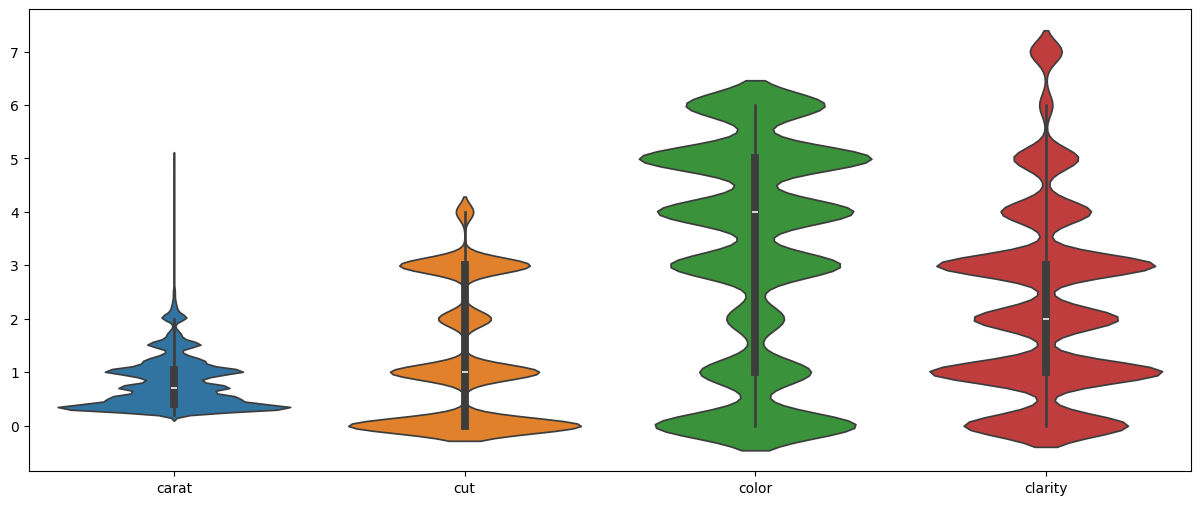

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=data.loc[:,['carat','cut','color','clarity']], ax=ax)

Finally, it is possible to calculate the correlation matrix, a symmetric matrix that shows the correlation among pairs of data features: values close to 1.0 highlight strong positive correlation between the selected features meaning that both features move in the same direction, whereas negative values imply variations in opposite directions.  
__Goals__:  
__Understanding Relationships__: It helps you understand the relationships between different numeric variables. For example, if carat is strongly correlated with price, you may want to use carat as a predictor for price in a model.  
__Feature Selection__: In machine learning, you might use correlation analysis to identify features that are strongly related to the target variable or to eliminate redundant features.  
__Identifying Patterns__: It helps in discovering hidden patterns, such as whether the quality of a diamond's cut is related to its price or size.

In [45]:
data.loc[:,['carat','cut','color','clarity']].corr()

,carat,cut,color,clarity
carat,1.000000,0.114426,-0.065386,-0.281218
cut,0.114426,1.000000,-0.029128,-0.118670
color,-0.065386,-0.029128,1.000000,0.032589
clarity,-0.281218,-0.118670,0.032589,1.000000


### Assignment
Following the example provided above, perform a complete data exploration task on the supplied <code>covid19_cases.csv</code>, trying to extract and plot significant information about the geographical incidence of the virus and focusing on an area of your particular interest.

### Add below your solution

In [46]:
import pandas as pd
import numpy as np

filename = '/content/gdrive/MyDrive/Colab Notebooks/Assignment/covid19_cases.csv'
cvd = pd.read_csv(filename)
data = cvd.copy()
data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
58685,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58686,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58687,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58688,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
58689,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


### I want to explore the data for the Scandinavian countries: Norway, Sweden, and Denmark, and compare the historical data of cases, deaths and cumulative number for 14 days of COVID-19 cases per 100000 inhabitants (CN) in these countries.

In [47]:
# I'll start by extracting scandinavian data:
scandiData = data[data['geoId'].isin(['SE','DK','NO'])]
scandiData['geoId'].unique()

array(['DK', 'NO', 'SE'], dtype=object)

In [48]:
# Then I'll rename the last column to make it easier to work with:
scandiData.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'CN'},inplace=True)
scandiData

<ipython-input-48-2d607e13a490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scandiData.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'CN'},inplace=True)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,CN
14770,29/11/2020,29,11,2020,1636,7,Denmark,DK,DNK,5806081.0,Europe,297.550103
14771,28/11/2020,28,11,2020,1323,5,Denmark,DK,DNK,5806081.0,Europe,287.939490
14772,27/11/2020,27,11,2020,1191,9,Denmark,DK,DNK,5806081.0,Europe,283.013620
14773,26/11/2020,26,11,2020,1183,5,Denmark,DK,DNK,5806081.0,Europe,279.913422
14774,25/11/2020,25,11,2020,1367,8,Denmark,DK,DNK,5806081.0,Europe,276.658214
...,...,...,...,...,...,...,...,...,...,...,...,...
51514,04/01/2020,4,1,2020,0,0,Sweden,SE,SWE,10230185.0,Europe,NaN
51515,03/01/2020,3,1,2020,0,0,Sweden,SE,SWE,10230185.0,Europe,NaN
51516,02/01/2020,2,1,2020,0,0,Sweden,SE,SWE,10230185.0,Europe,NaN
51517,01/01/2020,1,1,2020,0,0,Sweden,SE,SWE,10230185.0,Europe,NaN


In [49]:
# Then I will filter the data to show only the columns of interest:
scandiData = scandiData.loc[:,['month', 'geoId', 'cases', 'deaths', 'CN']]
scandiData

,month,geoId,cases,deaths,CN
14770,11,DK,1636,7,297.550103
14771,11,DK,1323,5,287.939490
14772,11,DK,1191,9,283.013620
14773,11,DK,1183,5,279.913422
14774,11,DK,1367,8,276.658214
...,...,...,...,...,...
51514,1,SE,0,0,NaN
51515,1,SE,0,0,NaN
51516,1,SE,0,0,NaN
51517,1,SE,0,0,NaN


In [50]:
# Further, I will filter out rows with NaN-values:
scandiData = scandiData.dropna()
scandiData


,month,geoId,cases,deaths,CN
14770,11,DK,1636,7,297.550103
14771,11,DK,1323,5,287.939490
14772,11,DK,1191,9,283.013620
14773,11,DK,1183,5,279.913422
14774,11,DK,1367,8,276.658214
...,...,...,...,...,...
51501,1,SE,0,0,0.000000
51502,1,SE,0,0,0.000000
51503,1,SE,0,0,0.000000
51504,1,SE,0,0,0.000000


In [51]:
# To create the histograms, I will need to group the data by month and geoId:
scandiData = scandiData.groupby(by=['month', 'geoId'], as_index=False).sum()
scandiData

,month,geoId,cases,deaths,CN
0,1,DK,0,0,0.000000
1,1,NO,0,0,0.000000
2,1,SE,0,0,0.000000
3,2,DK,2,0,0.068893
4,2,NO,6,0,0.206448
5,2,SE,11,0,0.166175
6,3,DK,2575,77,398.427097
7,3,NO,4220,26,691.320090
8,3,SE,4349,334,314.627741
9,4,DK,6431,366,1522.937761


<Axes: xlabel='month'>

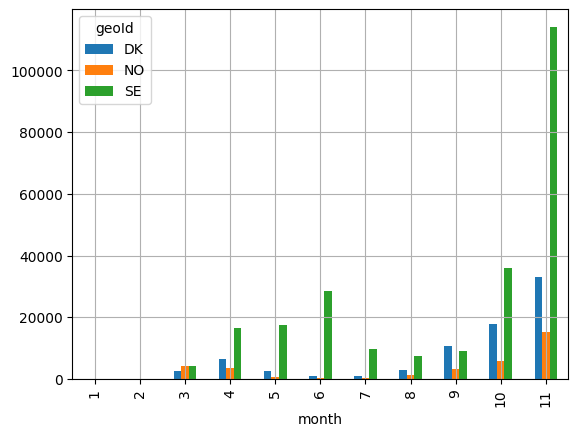

In [52]:
# We can then plot the histogram of the number of cases in each country in 2020:
scandiData.pivot(index='month', columns='geoId', values='cases').plot(kind='bar', stacked=False, grid=True)


<Axes: xlabel='month'>

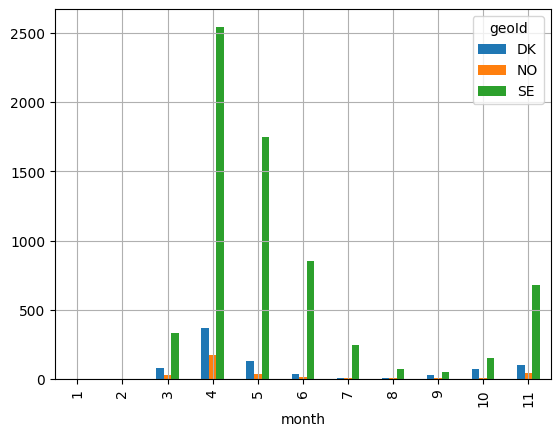

In [53]:
# And a monthly histogram of the number of deaths:
scandiData.pivot(index='month', columns='geoId', values='deaths').plot(kind='bar', stacked=False, grid=True)

<Axes: xlabel='month'>

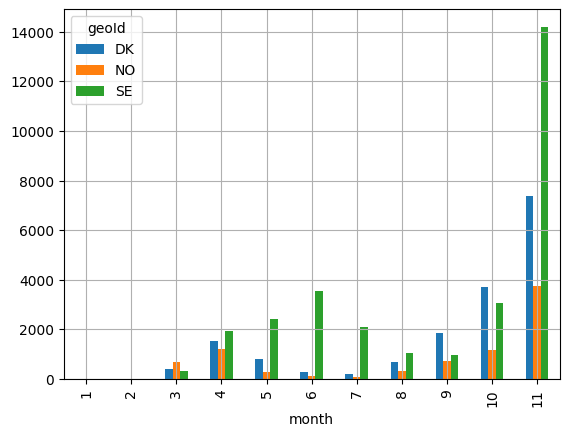

In [54]:
# And lastly, a monthly histogram of CN:
scandiData.pivot(index='month', columns='geoId', values='CN').plot(kind='bar', stacked=False, grid=True)

In [55]:
# Finally, to sum up the comparison between the trends of COVID-19 in the scandinavian countries in 2020,
# we can create correlation matrices to numerically compare the development of cases, deaths and CN in the countries:

# Cases:
scandiData.pivot(index='month', columns='geoId', values='cases').corr()



geoId,DK,NO,SE
geoId,,,
DK,1.000000,0.957709,0.908547
NO,0.957709,1.000000,0.910816
SE,0.908547,0.910816,1.000000


In [56]:
# Deaths:
scandiData.pivot(index='month', columns='geoId', values='deaths').corr()

geoId,DK,NO,SE
geoId,,,
DK,1.000000,0.977639,0.905575
NO,0.977639,1.000000,0.865280
SE,0.905575,0.865280,1.000000


In [57]:
# CN:
scandiData.pivot(index='month', columns='geoId', values='CN').corr()


geoId,DK,NO,SE
geoId,,,
DK,1.000000,0.958965,0.896102
NO,0.958965,1.000000,0.903654
SE,0.896102,0.903654,1.000000


#### To summarize, from the histograms its clear that Covid-19 had a bigger impact on Sweden historically than for the other scandinavian countries. Though Denmark is displaying higher numbers in all trends compared to Norway in the histograms, the correlation matrices showcase a near identical development of Covid-19 in the two countries. Sweden does also have a strong correlation to both Norway and Denmark, but comparatively weaker.